In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
pd.set_option('display.float_format', lambda x: '%.7f' % x)

### **1. Import the required packages**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#machine learning related packages
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

### **2. Reading and Exploring the data**

In [ ]:
housing = pd.read_csv('Housing.csv')

In [ ]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
housing.shape #print the number of rows and columns

(545, 13)

In [ ]:
housing.dtypes #print the datatype of values in each column

,0
price,int64
area,int64
bedrooms,int64
bathrooms,int64
stories,int64
mainroad,object
guestroom,object
basement,object
hotwaterheating,object
airconditioning,object


In [ ]:
housing.isnull().sum()  #print the number of missing values column-wise

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [ ]:
housing.duplicated().sum()  #print the total number of duplicate rows in the data

np.int64(0)

In [ ]:
housing.drop_duplicates(inplace = True)

### **Visualizing the data**

- Before we encode the object columns, we will visualize the data with original values

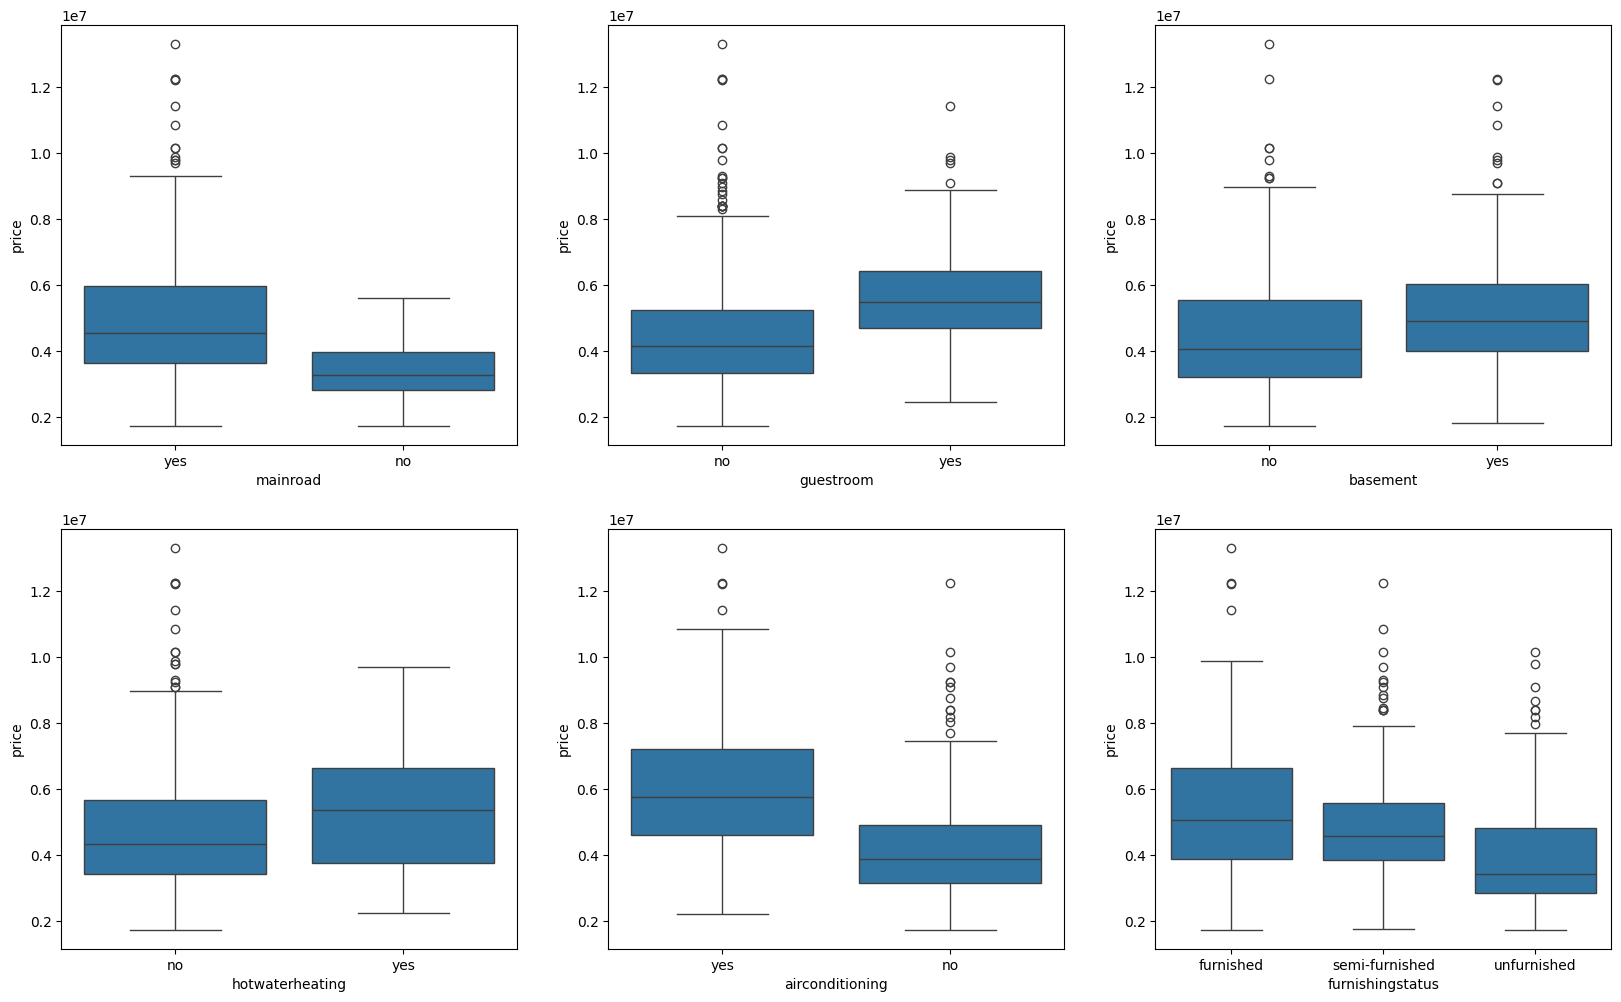

In [ ]:
plt.figure(figsize = (20,12))

plt.subplot(2,3,1)
sns.boxplot(x = 'mainroad', y = 'price', data = housing)
plt.subplot(2,3,2)
sns.boxplot(x = 'guestroom', y = 'price', data = housing)
plt.subplot(2,3,3)
sns.boxplot(x = 'basement', y = 'price', data = housing)
plt.subplot(2,3,4)
sns.boxplot(x = 'hotwaterheating', y = 'price', data = housing)
plt.subplot(2,3,5)
sns.boxplot(x = 'airconditioning', y = 'price', data = housing)
plt.subplot(2,3,6)
sns.boxplot(x = 'furnishingstatus', y = 'price', data = housing)
plt.show()

**Observation** :

In [ ]:
sns.set() #changing the default styling from matplotlb style to seaborn style

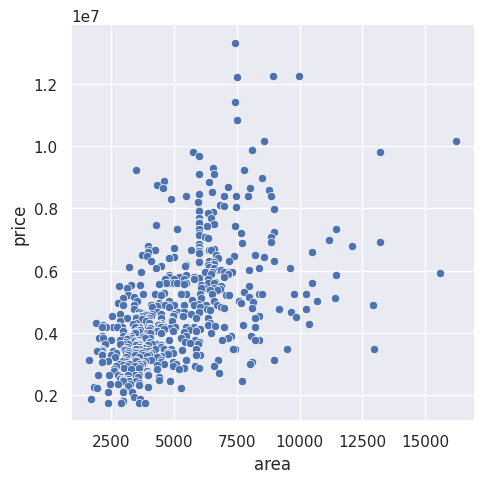

In [ ]:
sns.relplot(x = 'area', y = 'price', data = housing)
plt.show()

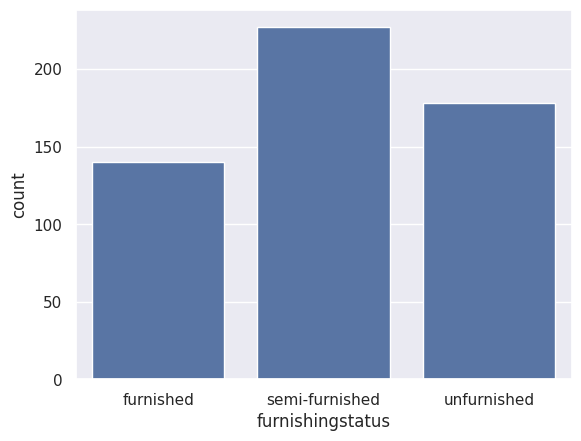

In [ ]:
sns.countplot(x = 'furnishingstatus', data = housing)
plt.show()

### **Data Preparations**

In [ ]:
obj_cols = housing.select_dtypes(object).columns

In [ ]:
obj_cols = obj_cols.to_list()

In [ ]:
print(obj_cols)

['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']


In [ ]:
obj_cols.pop(-1)

'furnishingstatus'

In [ ]:
print(obj_cols)

['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']


In [ ]:
le = LabelEncoder()

for column in obj_cols:
  housing[column] = le.fit_transform(housing[column])

Let's perform the one hot encoding on the furnishing status since it has more than 2 categories

In [ ]:
status = pd.get_dummies(housing['furnishingstatus'], dtype = int, drop_first = True)

In [ ]:
status

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0
...,...,...
540,0,1
541,1,0
542,0,1
543,0,0


In [ ]:
housing = pd.concat([housing, status], axis = 1)

In [ ]:
housing.drop(columns = 'furnishingstatus', inplace = True)

In [ ]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


In [ ]:
housing.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
count,545.0000000,545.0000000,545.0000000,545.0000000,545.0000000,545.0000000,545.0000000,545.0000000,545.0000000,545.0000000,545.0000000,545.0000000,545.0000000,545.0000000
mean,4766729.2477064,5150.5412844,2.9651376,1.2862385,1.8055046,0.8587156,0.1779817,0.3504587,0.0458716,0.3155963,0.6935780,0.2348624,0.4165138,0.3266055
std,1870439.6156574,2170.1410225,0.7380639,0.5024696,0.8674925,0.3486347,0.3828487,0.4775519,0.2093987,0.4651799,0.8615858,0.4243022,0.4934337,0.4694024
min,1750000.0000000,1650.0000000,1.0000000,1.0000000,1.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000
25%,3430000.0000000,3600.0000000,2.0000000,1.0000000,1.0000000,1.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000
50%,4340000.0000000,4600.0000000,3.0000000,1.0000000,2.0000000,1.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000
75%,5740000.0000000,6360.0000000,3.0000000,2.0000000,2.0000000,1.0000000,0.0000000,1.0000000,0.0000000,1.0000000,1.0000000,0.0000000,1.0000000,1.0000000
max,13300000.0000000,16200.0000000,6.0000000,4.0000000,4.0000000,1.0000000,1.0000000,1.0000000,1.0000000,1.0000000,3.0000000,1.0000000,1.0000000,1.0000000


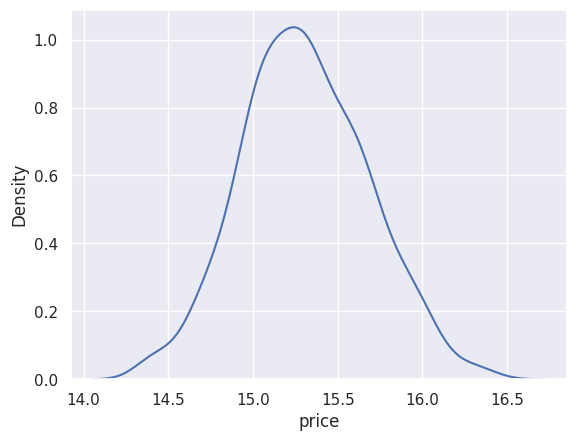

In [ ]:
sns.kdeplot(x = 'price', data = housing)
plt.show()

In [ ]:
housing['price'] = np.log(housing['price'])
housing['area'] = np.log(housing['area'])

In [ ]:
housing['price']

,price
0,16.4032746
1,16.3210365
2,16.3210365
3,16.3181753
4,16.2500007
...,...
540,14.4143471
541,14.3848786
542,14.3751263
543,14.3751263


In [ ]:
housing.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
count,545.0000000,545.0000000,545.0000000,545.0000000,545.0000000,545.0000000,545.0000000,545.0000000,545.0000000,545.0000000,545.0000000,545.0000000,545.0000000,545.0000000
mean,15.3069869,8.4665375,2.9651376,1.2862385,1.8055046,0.8587156,0.1779817,0.3504587,0.0458716,0.3155963,0.6935780,0.2348624,0.4165138,0.3266055
std,0.3721652,0.3982834,0.7380639,0.5024696,0.8674925,0.3486347,0.3828487,0.4775519,0.2093987,0.4651799,0.8615858,0.4243022,0.4934337,0.4694024
min,14.3751263,7.4085306,1.0000000,1.0000000,1.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000
25%,15.0480708,8.1886891,2.0000000,1.0000000,1.0000000,1.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000
50%,15.2833849,8.4338116,3.0000000,1.0000000,2.0000000,1.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000
75%,15.5629698,8.7577837,3.0000000,2.0000000,2.0000000,1.0000000,0.0000000,1.0000000,0.0000000,1.0000000,1.0000000,0.0000000,1.0000000,1.0000000
max,16.4032746,9.6927665,6.0000000,4.0000000,4.0000000,1.0000000,1.0000000,1.0000000,1.0000000,1.0000000,3.0000000,1.0000000,1.0000000,1.0000000


### **Machine Learning Process**

In [ ]:
df_train, df_test = train_test_split(housing, train_size = 0.8, test_size = 0.2, random_state = 100)

**Standardization/Scaling of the data**

In [ ]:
scaler = StandardScaler()

In [ ]:
num_cols = ['area', 'price', 'bedrooms', 'bathrooms', 'stories', 'parking']

In [ ]:
df_train[num_cols] = scaler.fit_transform(df_train[num_cols])

In [ ]:
#split the data into X_train, y_train
X_train = df_train.drop(columns = 'price')
y_train = df_train['price']

### **Building the linear regression model**

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
lin_reg.coef_ #m1 to m13

array([ 0.3017325 ,  0.05172491,  0.26013034,  0.19529025,  0.36464589,
        0.18010192,  0.22809761,  0.43976627,  0.42920836,  0.09146178,
        0.33811759, -0.00365457, -0.31753307])

In [ ]:
lin_reg.intercept_ #c value

np.float64(-0.5518510086009326)

### **Check for Multi-Collinearity using VIF**

- After training the model, we can check for multi-collinearity present in the data using VIF scores

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['Features'] = X_train.columns

In [ ]:
vif

,vif,Features
0,1.3164554,area
1,1.3764711,bedrooms
2,1.3021169,bathrooms
3,1.4755673,stories
4,3.7634710,mainroad
5,1.4843161,guestroom
6,2.0248391,basement
7,1.1027773,hotwaterheating
8,1.6107013,airconditioning
9,1.2025861,parking


The columns which have VIF > 5 have to be dropped because they are highly correlated with other input columns. We don't have any such issue in this data.

#### **Testing Process**

In [ ]:
df_test[num_cols] = scaler.transform(df_test[num_cols])

In [ ]:
X_test = df_test.drop(columns = 'price')
y_test = df_test['price']

In [ ]:
y_pred = lin_reg.predict(X_test)

In [ ]:
r2_score(y_test, y_pred)

0.7061602659473329